In [1]:
import json
import pandas as pd
import numpy as np
import prettytable as pt
from IPython.display import Image
import os 
import warnings
warnings.filterwarnings("ignore")



###################################################################################################
                                                                                                  #
from rhoova.Client import *                                                                       #   
#Register and get api key from https://app.rhoova.com/ for ClientConfig("api key", "api secret")  #
config = ClientConfig("", "")                #                                                    #
api = Api(config)                                                                                 # 
                                                                                                  #
###################################################################################################

directory = os.path.normpath(os.getcwd() + os.sep + os.pardir + os.sep + os.pardir)
yielddatadirectory=directory+"/data/yielddata/yielddata.csv"
voldatadirectory=directory+"/data/volatilitydata/capimpliedvol.csv"

yielddata = pd.read_csv(yielddatadirectory)
yielddata = yielddata.replace(np.nan, '', regex=True) 
voldata = pd.read_csv(voldatadirectory)
voldata = voldata.replace(np.nan, '', regex=True) 



In [2]:
data = {
         "valuationDate": "2021-06-08",
         "settlementDate": "2021-06-10",
         "maturityDate": "2026-06-10",
         "notional": 10000000,
         "capFloorDefinition": {
           "type": "Floor",
           "capStrike": 0,
           "floorStrike": 0.008426,
           "calibrate": False,
           "frequency": "Quarterly",
           "startDate": "2021-09-10",
           "currency": "USD",
           #"volatility": 0.0,
           "method": "Bachelier",
           "volatilityModel": "Normal",
           "dayCounter": "Actual360",
           "calendar": "UnitedStates",
           "businessDayConvention": "ModifiedFollowing",
           "dateGeneration": "Backward",
           "endOfMonth": True,
           "fixingDate": ["2021-06-08"],
           "fixingRate": [0.001280],
           "longShort":"long"
         },
         "forecastCurve": {
           "settlementDays": 2,
           "intpMethod": "Linear",
           "currency": "USD",
           "calendar": "UnitedStates",
           "dayCounter": "Thirty360",
           "period": "3M",
           "instruments": {
             "DEPO": {
               "businessDayConvention": "ModifiedFollowing",
               "dayCounter": "Actual360"
             },
             "FUTURES": {
               "businessDayConvention": "ModifiedFollowing",
               "dayCounter": "Actual360",
               "market": "IMM",
             },
             "IRS": {
               "businessDayConvention": "ModifiedFollowing",
               "dayCounter": "Thirty360",
               "frequency": "Semiannual"
             }
           }
         },
         "discountCurve": {
           "settlementDays": 2,
           "intpMethod": "Linear",
           "currency": "USD",
           "calendar": "UnitedStates",
           "dayCounter": "Thirty360",
           "period": "3M",
           "instruments": {
             "DEPO": {
               "businessDayConvention": "ModifiedFollowing",
               "dayCounter": "Actual360"
             },
             "FUTURES": {
               "businessDayConvention": "ModifiedFollowing",
               "dayCounter": "Actual360",
               "market": "IMM",
             },
             "IRS": {
               "businessDayConvention": "ModifiedFollowing",
               "dayCounter": "Thirty360",
               "frequency": "Semiannual"
             }
           }
         },
  "yieldData": yielddata.to_dict('r'),
  "volatilityData" :voldata.to_dict('r')
  }

try:
    result = api.createTask(CalculationType.CAP_FLOOR, data,True)
    result=json.loads(result["result"])
except RhoovaError as e:
    e.printPretty()
    

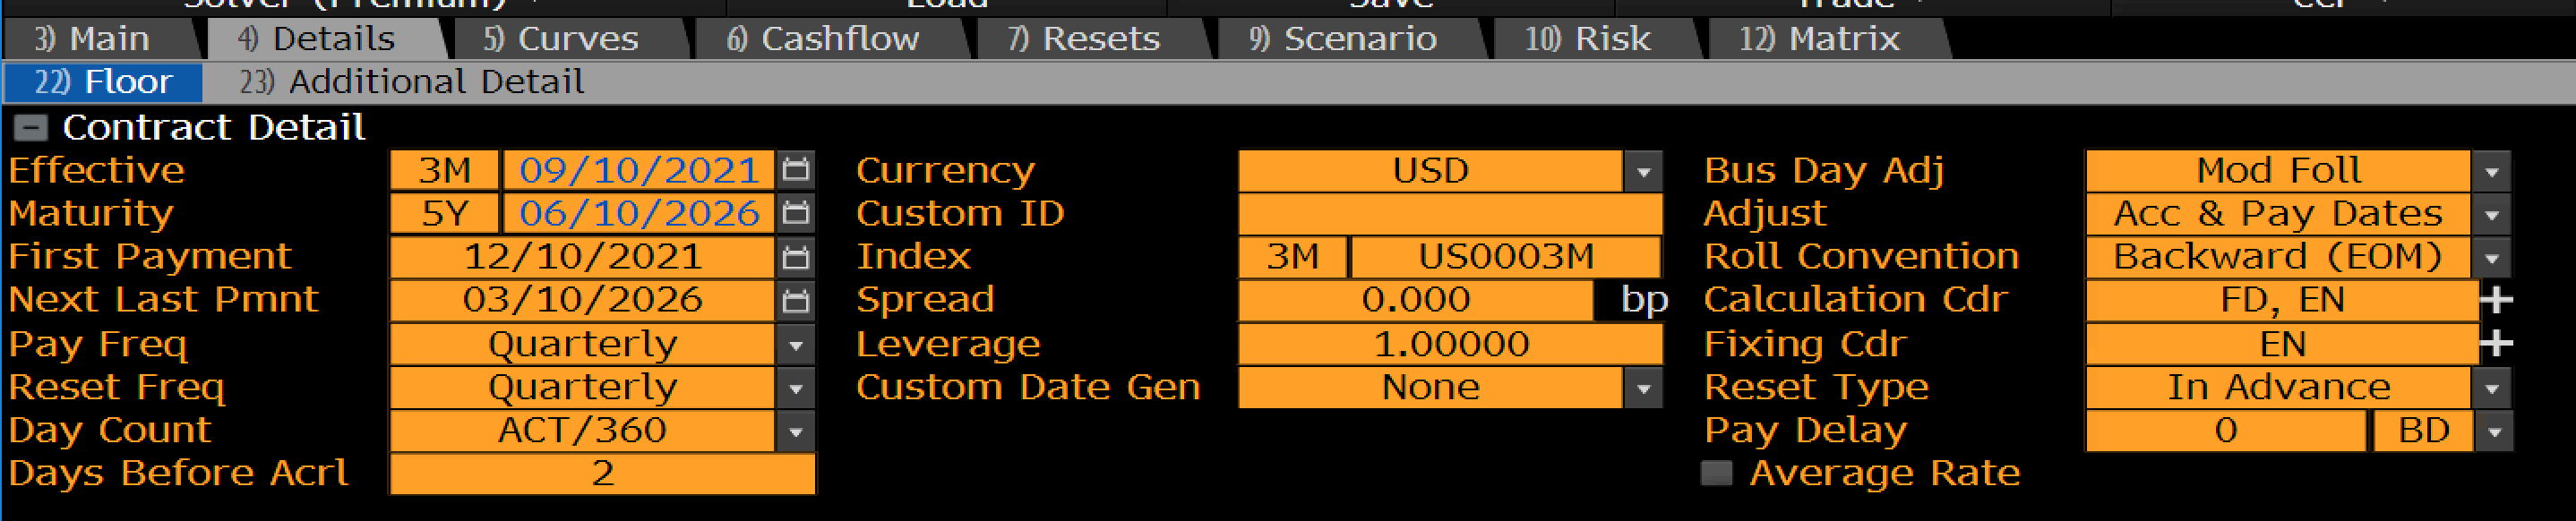

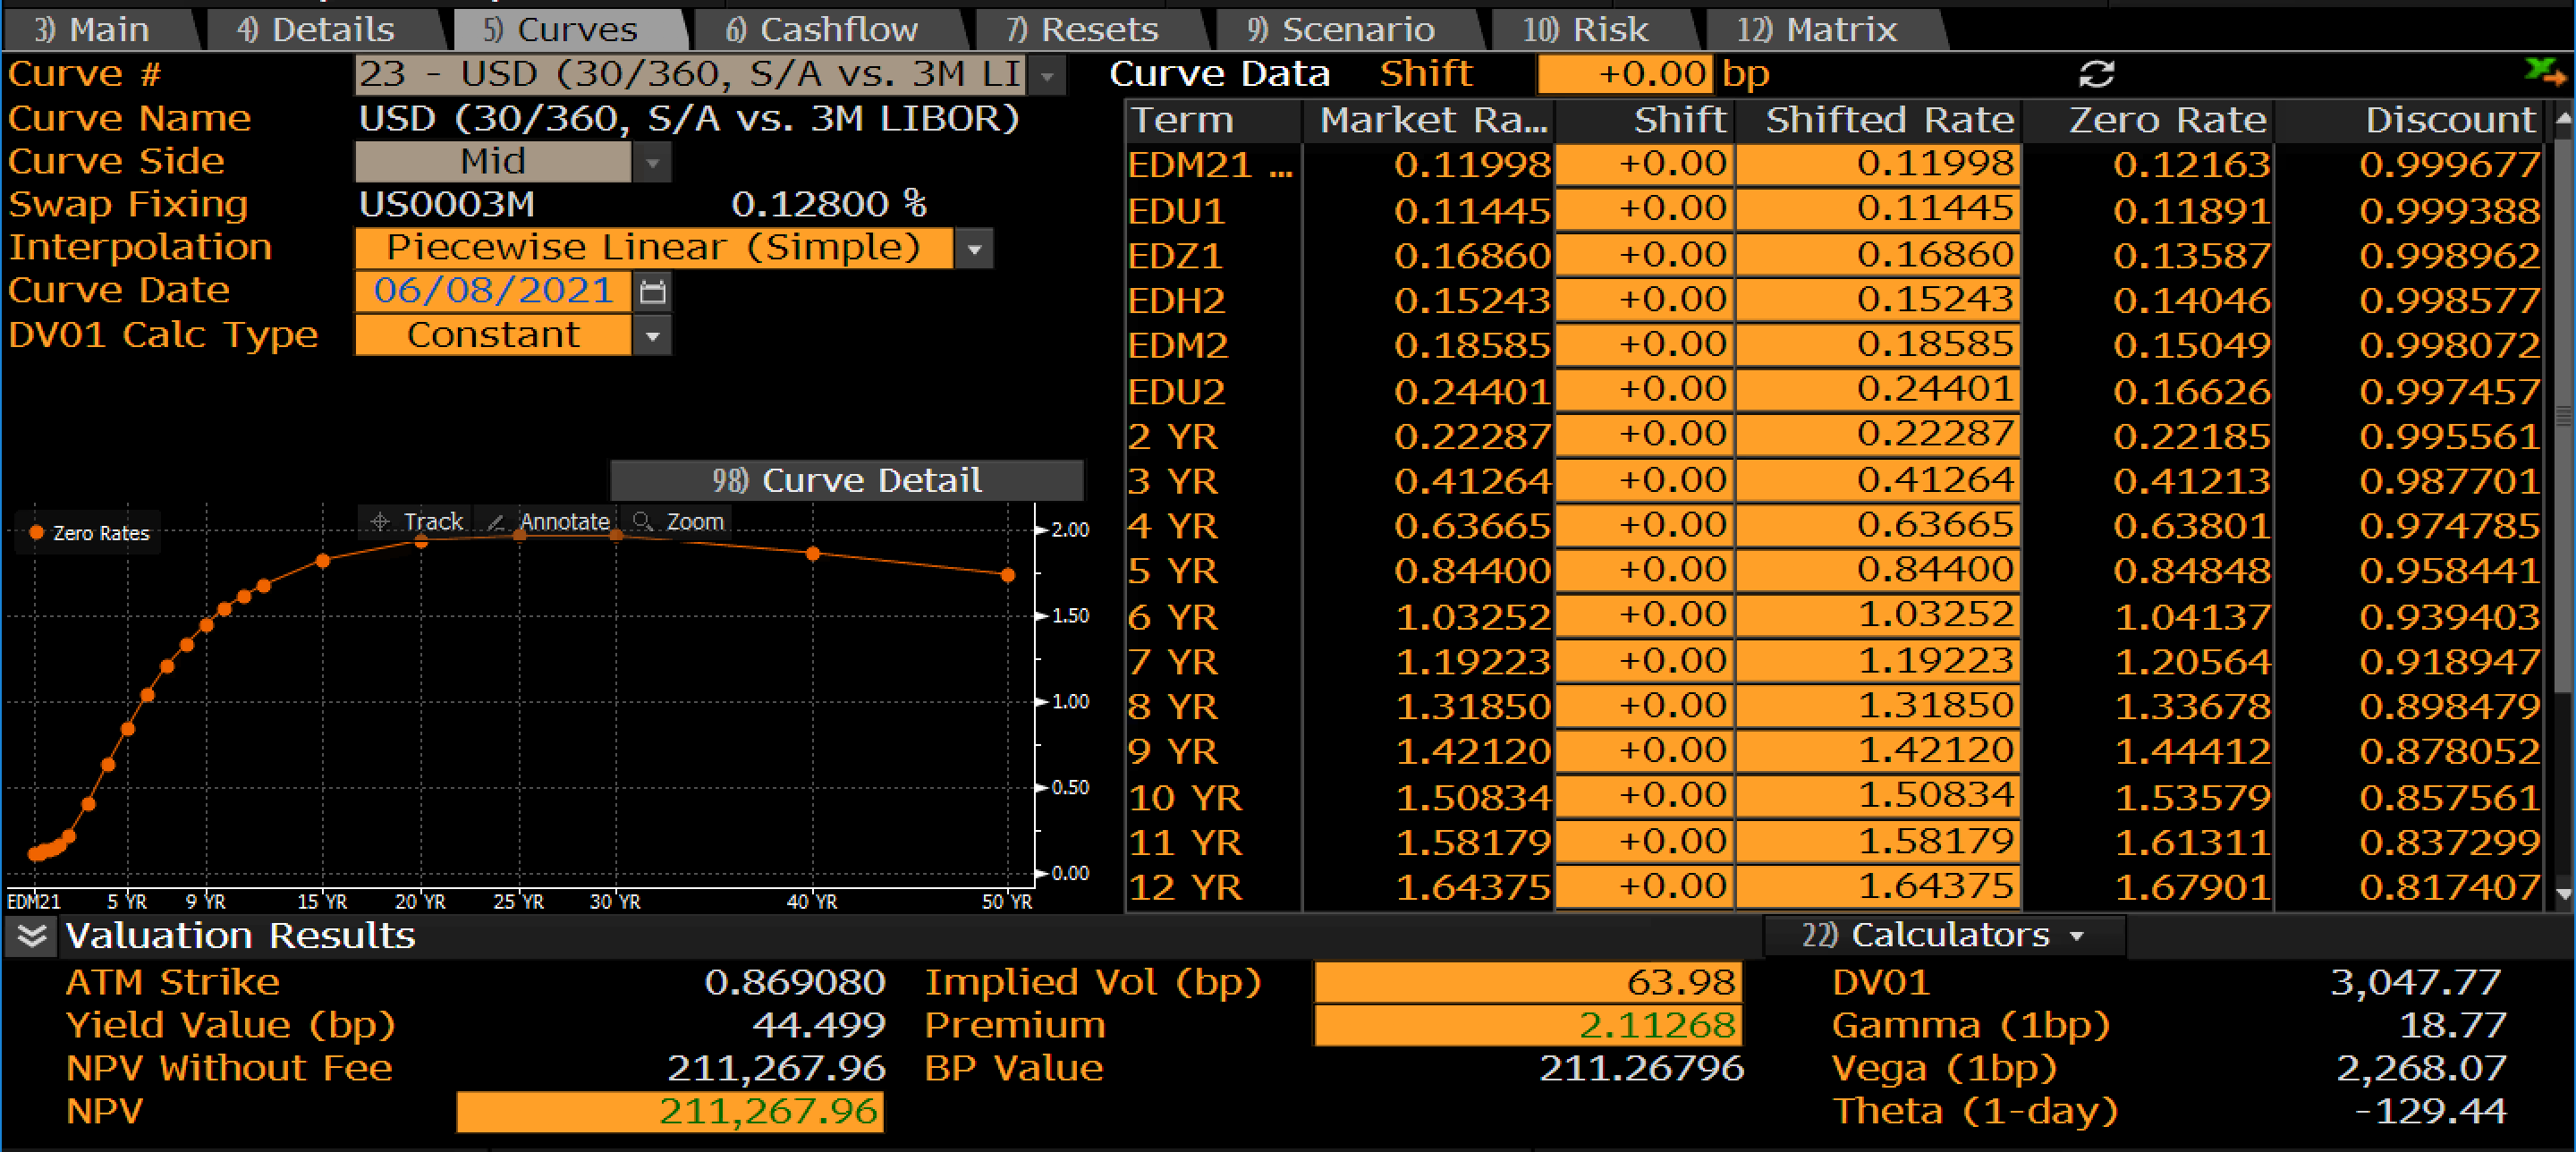

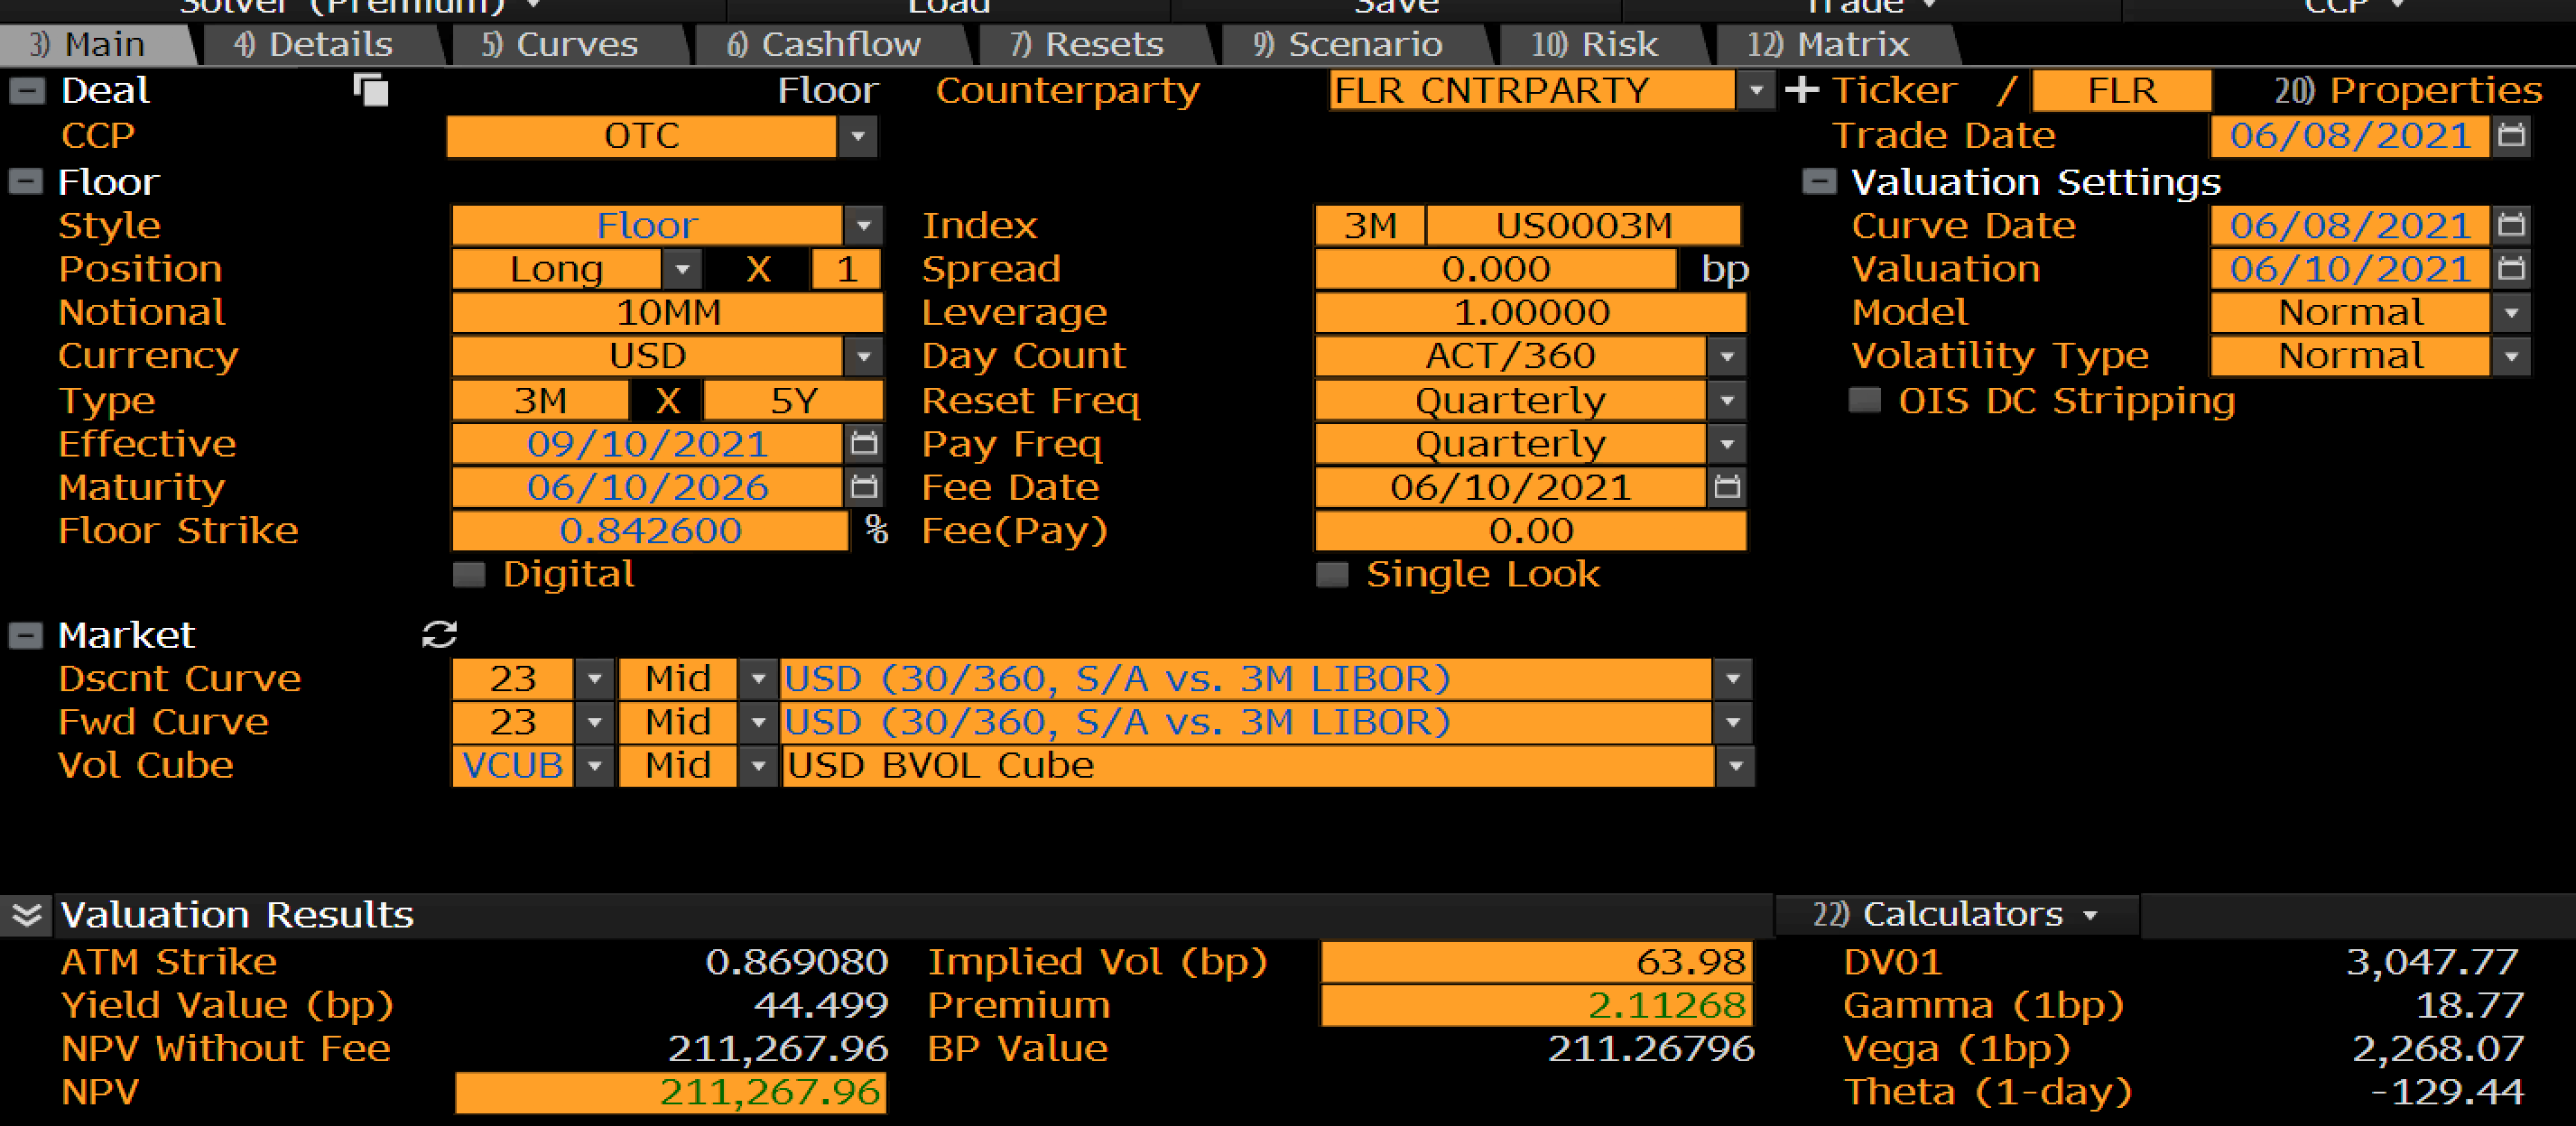

In [3]:
npvTable = pt.PrettyTable(['Parameters', 'Value'])
npvTable.add_row(['PV', result.get('pv')])
npvTable.add_row(['Implied Volatility', 100*result.get('impliedVolatility')])
npvTable.add_row(['ATMStrike', 100*result.get('atmStrike')])
npvTable.add_row(['Vega', result.get('vega')])
npvTable.align = 'r'
npvTable.float_format = '.4'
print(npvTable)

+--------------------+-------------+
|         Parameters |       Value |
+--------------------+-------------+
|                 PV | 209620.3016 |
| Implied Volatility |     70.1639 |
|          ATMStrike |      0.8693 |
|               Vega |   2266.9667 |
+--------------------+-------------+


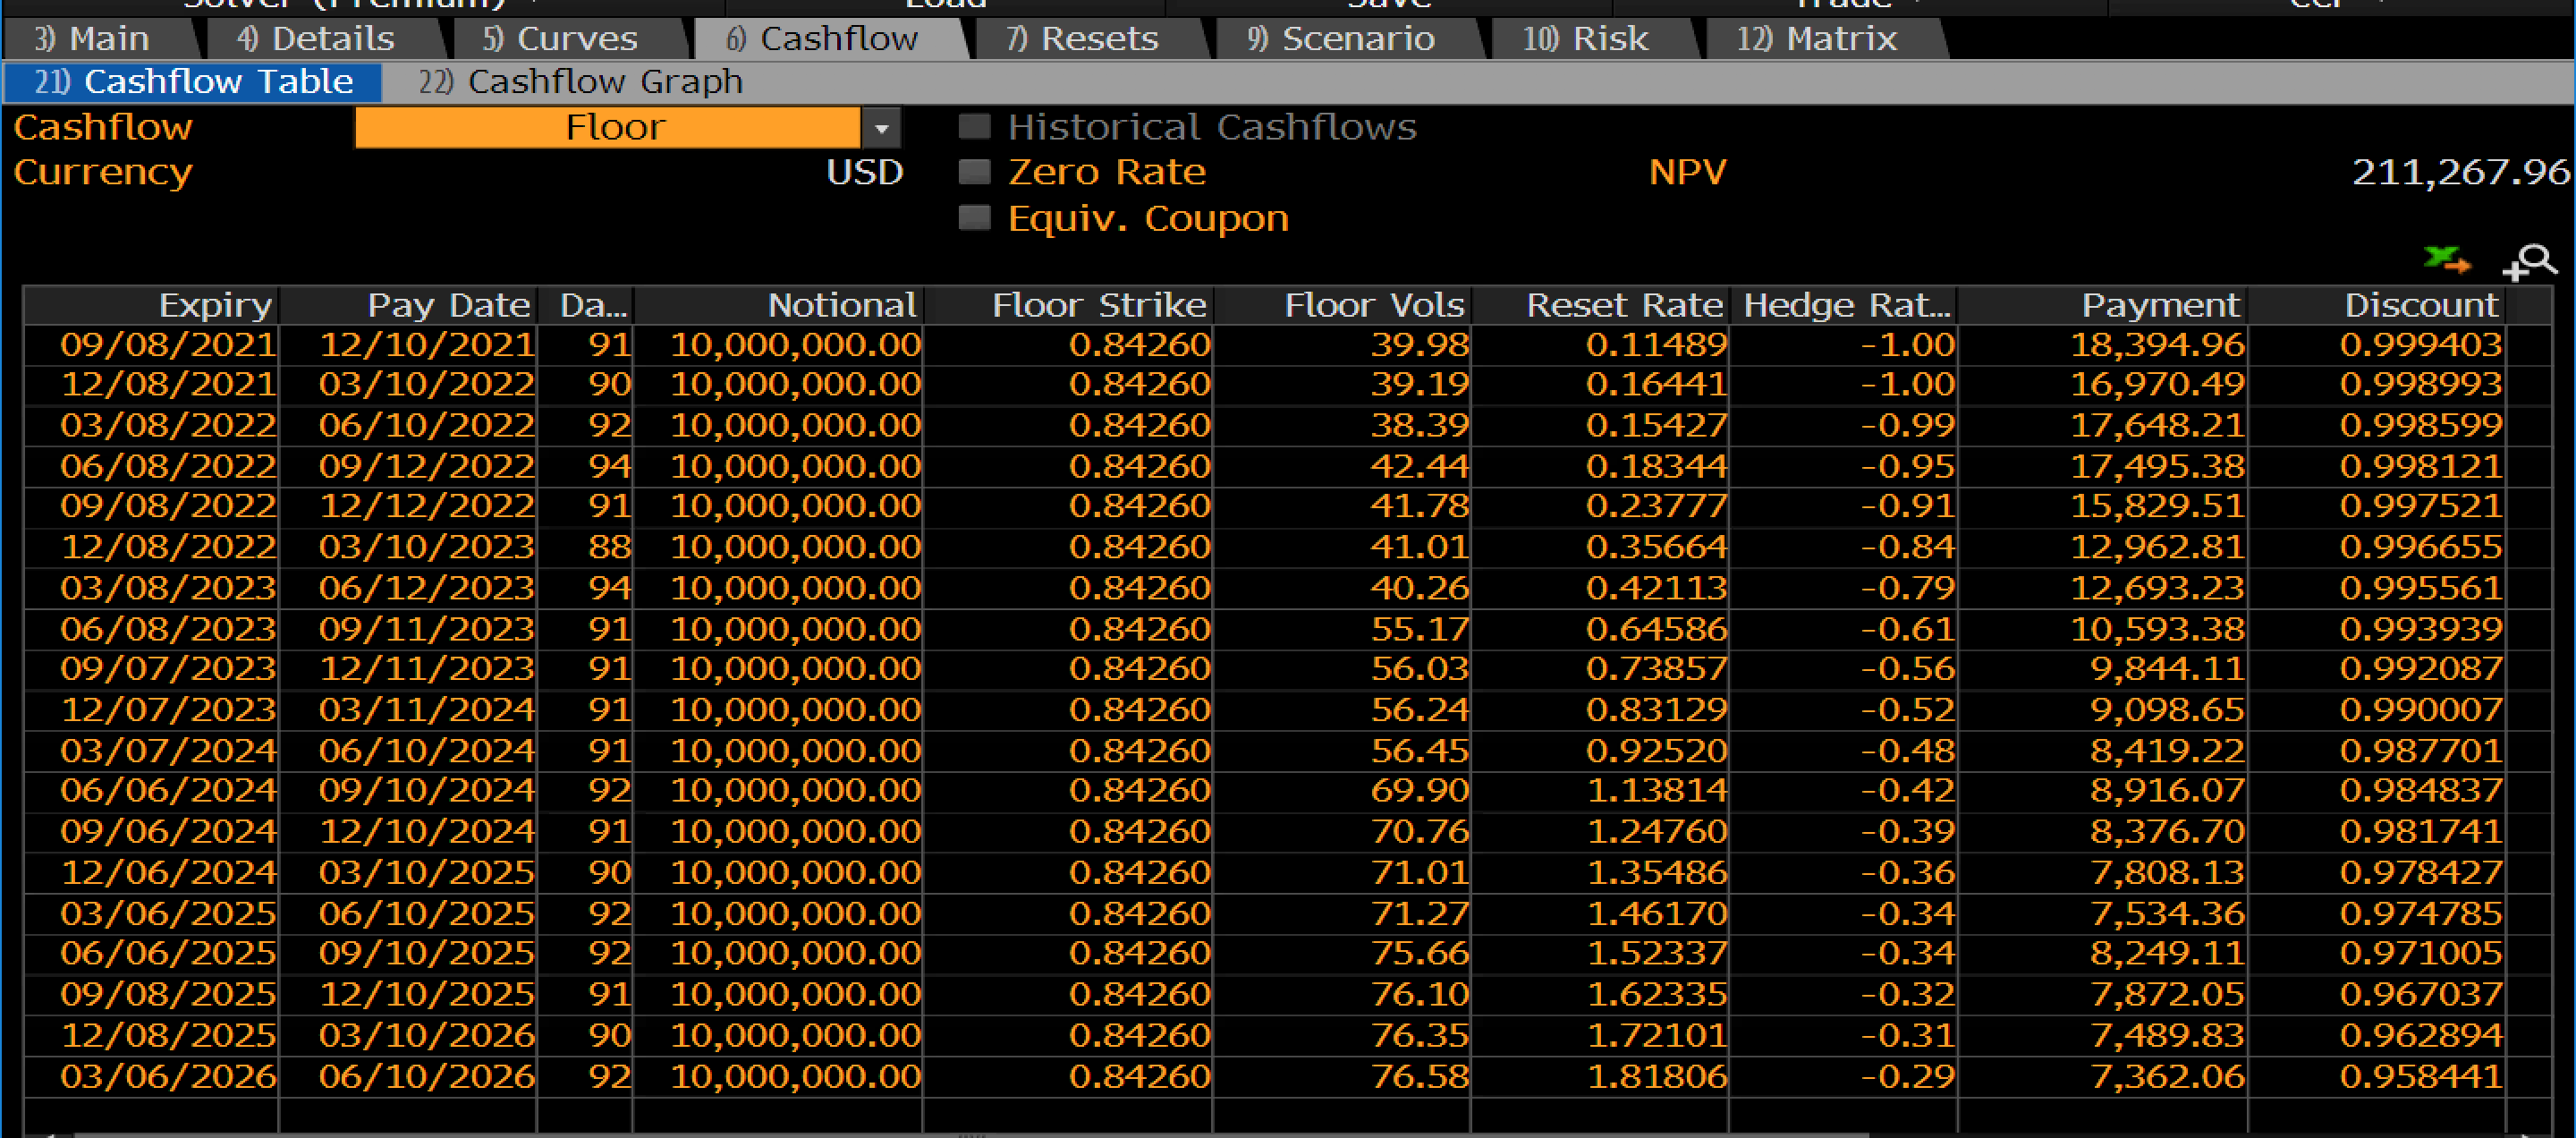

In [4]:
cashflows=pd.DataFrame(result.get("data"))
cashflows

,fixingDate,accrualStart,accrualEnd,notional,currency,leg,payOrReceive,capRate,floorRate,termToMatByDay,termToMatByYear,cashflow,discountFactor,cashflowPv,resetRate,capVolatility,floorVolatility,hedgeRatio
0,2021-09-08,2021-09-10,2021-12-10,10000000,USD,Floating,Long,0,0.008426,183,0.508333,18307.359152,0.999392,18296.234733,0.001179,0,0.379625,6.142103
1,2021-12-08,2021-12-10,2022-03-10,10000000,USD,Floating,Long,0,0.008426,273,0.758333,16848.305185,0.998972,16830.977068,0.001685,0,0.382025,3.999462
2,2022-03-08,2022-03-10,2022-06-10,10000000,USD,Floating,Long,0,0.008426,365,1.013889,17515.846716,0.998567,17490.743745,0.001586,0,0.384817,4.322125
3,2022-06-08,2022-06-10,2022-09-12,10000000,USD,Floating,Long,0,0.008426,459,1.275000,17180.386715,0.998070,17147.229311,0.001906,0,0.391902,3.451542
4,2022-09-08,2022-09-12,2022-12-12,10000000,USD,Floating,Long,0,0.008426,550,1.527778,15436.647028,0.997444,15397.190516,0.002483,0,0.406035,2.459333
5,2022-12-08,2022-12-12,2023-03-10,10000000,USD,Floating,Long,0,0.008426,638,1.772222,13008.382216,0.996588,12963.999876,0.003513,0,0.434365,1.514844
6,2023-03-08,2023-03-10,2023-06-12,10000000,USD,Floating,Long,0,0.008426,732,2.033333,13346.075850,0.995540,13286.556917,0.004031,0,0.477181,1.268005
7,2023-06-08,2023-06-12,2023-09-11,10000000,USD,Floating,Long,0,0.008426,823,2.286111,9610.666627,0.993932,9552.349236,0.006401,0,0.534908,0.593930
8,2023-09-07,2023-09-11,2023-12-11,10000000,USD,Floating,Long,0,0.008426,914,2.538889,9362.499933,0.992072,9288.276068,0.007416,0,0.592763,0.499424
9,2023-12-07,2023-12-11,2024-03-11,10000000,USD,Floating,Long,0,0.008426,1005,2.791667,9452.751914,0.989979,9358.026289,0.008365,0,0.639395,0.447073
